In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pprint
#import gensim

%matplotlib inline

In [2]:
DATA_DIR = "../owentemple-ted-talks-complete-list"

In [3]:
with open(DATA_DIR + '/datapackage.json', 'r') as f:
    metadata = json.load(f)

In [4]:
metadata.keys()

dict_keys(['name', 'title', 'description', 'homepage', 'resources', 'keywords'])

In [5]:
#pprint.pprint(metadata)

# Basic visualizations

In [6]:
ted_talks = pd.read_csv(DATA_DIR + '/data/ted_talks_by_id_plus_transcripts_and_liwc_and_mft_plus_views.csv')

In [7]:
ted_talks.head()

,id,speaker,headline,url,description,transcript_url,month_filmed,year_filmed,event,duration,...,harm_vice,fairness_virtue,fairness_vice,ingroup_virtue,ingroup_vice,authority_virtue,authority_vice,purity_virtue,purity_vice,morality_general
0,1,Al Gore,Averting the climate crisis,http://www.ted.com/talks/view/id/1,With the same humor and humanity he exuded in ...,http://www.ted.com/talks/view/id/1/transcript?...,2,2006,TED2006,00:16:17,...,0.04,0.00,0.00,0.48,0.00,0.22,0.0,0.00,0.00,0.22
1,2,Amy Smith,Simple designs to save a life,http://www.ted.com/talks/view/id/2,Fumes from indoor cooking fires kill more than...,http://www.ted.com/talks/view/id/2/transcript?...,2,2006,TED2006,00:15:06,...,0.04,0.00,0.00,0.30,0.00,0.11,0.0,0.11,0.04,0.15
2,3,Ashraf Ghani,How to rebuild a broken state,http://www.ted.com/talks/view/id/3,Ashraf Ghani's passionate and powerful 10-minu...,http://www.ted.com/talks/view/id/3/transcript?...,7,2005,TEDGlobal 2005,00:18:45,...,0.12,0.16,0.04,0.32,0.12,0.20,0.0,0.04,0.04,0.08
3,4,Burt Rutan,The real future of space exploration,http://www.ted.com/talks/view/id/4,"In this passionate talk, legendary spacecraft ...",http://www.ted.com/talks/view/id/4/transcript?...,2,2006,TED2006,00:19:37,...,0.19,0.00,0.00,0.19,0.00,0.10,0.0,0.00,0.00,0.16
4,5,Chris Bangle,Great cars are great art,http://www.ted.com/talks/view/id/5,American designer Chris Bangle explains his ph...,http://www.ted.com/talks/view/id/5/transcript?...,2,2002,TED2002,00:20:04,...,0.05,0.03,0.00,0.39,0.00,0.05,0.0,0.00,0.03,0.13


In [8]:
ted_talks.iloc[:,:15].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2475 entries, 0 to 2474
Data columns (total 15 columns):
id                      2475 non-null int64
speaker                 2475 non-null object
headline                2475 non-null object
url                     2475 non-null object
description             2475 non-null object
transcript_url          2386 non-null object
month_filmed            2475 non-null int64
year_filmed             2475 non-null int64
event                   2475 non-null object
duration                2475 non-null object
date_published          2475 non-null object
views_as_of_06162017    2474 non-null float64
tags                    2475 non-null object
transcript              2386 non-null object
notes                   4 non-null object
dtypes: float64(1), int64(3), object(11)
memory usage: 290.2+ KB


## Based on first parse of data, we can see that

1. id is unique and can be used as index
2. tags can be a list of strings rather than a whole string
3. date published can be datetime format

In [9]:
ted_talks = pd.read_csv(DATA_DIR + '/data/ted_talks_by_id_plus_transcripts_and_liwc_and_mft_plus_views.csv', index_col="id", parse_dates=['date_published'])
ted_talks.head()

,speaker,headline,url,description,transcript_url,month_filmed,year_filmed,event,duration,date_published,...,harm_vice,fairness_virtue,fairness_vice,ingroup_virtue,ingroup_vice,authority_virtue,authority_vice,purity_virtue,purity_vice,morality_general
id,,,,,,,,,,,,,,,,,,,,,
1,Al Gore,Averting the climate crisis,http://www.ted.com/talks/view/id/1,With the same humor and humanity he exuded in ...,http://www.ted.com/talks/view/id/1/transcript?...,2,2006,TED2006,00:16:17,2006-06-27,...,0.04,0.00,0.00,0.48,0.00,0.22,0.0,0.00,0.00,0.22
2,Amy Smith,Simple designs to save a life,http://www.ted.com/talks/view/id/2,Fumes from indoor cooking fires kill more than...,http://www.ted.com/talks/view/id/2/transcript?...,2,2006,TED2006,00:15:06,2006-08-15,...,0.04,0.00,0.00,0.30,0.00,0.11,0.0,0.11,0.04,0.15
3,Ashraf Ghani,How to rebuild a broken state,http://www.ted.com/talks/view/id/3,Ashraf Ghani's passionate and powerful 10-minu...,http://www.ted.com/talks/view/id/3/transcript?...,7,2005,TEDGlobal 2005,00:18:45,2006-10-18,...,0.12,0.16,0.04,0.32,0.12,0.20,0.0,0.04,0.04,0.08
4,Burt Rutan,The real future of space exploration,http://www.ted.com/talks/view/id/4,"In this passionate talk, legendary spacecraft ...",http://www.ted.com/talks/view/id/4/transcript?...,2,2006,TED2006,00:19:37,2006-10-25,...,0.19,0.00,0.00,0.19,0.00,0.10,0.0,0.00,0.00,0.16
5,Chris Bangle,Great cars are great art,http://www.ted.com/talks/view/id/5,American designer Chris Bangle explains his ph...,http://www.ted.com/talks/view/id/5/transcript?...,2,2002,TED2002,00:20:04,2007-04-05,...,0.05,0.03,0.00,0.39,0.00,0.05,0.0,0.00,0.03,0.13


In [10]:
# Process tags
joined_tags = ted_talks['tags'].str.cat(sep=',').split(',')

In [11]:
all_tags = pd.Series(joined_tags).str.strip().str.lower()
tag_counts = all_tags.value_counts()
tag_counts.head()

technology       710
science          541
global issues    495
culture          484
tedx             432
dtype: int64

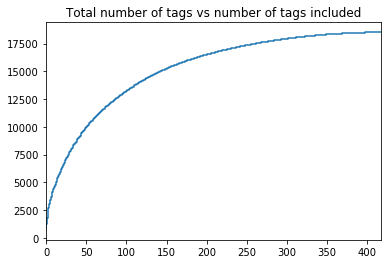

In [12]:
cumulative_tag_counts = np.cumsum(tag_counts)
cumulative_tag_counts.index = range(len(cumulative_tag_counts))
cumulative_tag_counts.plot(drawstyle='steps', title='Total number of tags vs number of tags included');

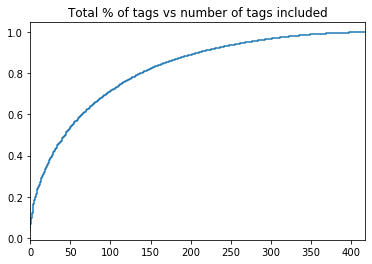

In [13]:
tag_ratios = cumulative_tag_counts / sum(tag_counts)
tag_ratios.plot(drawstyle='steps', title="Total % of tags vs number of tags included");

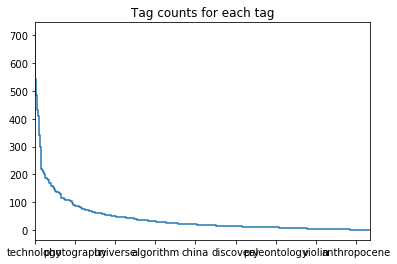

In [14]:
tag_counts.plot(drawstyle='steps', title="Tag counts for each tag");

### Seems like there are some rarely used tags that can be pruned when training our model, possibly set a threshold like 70% for number of tags to include

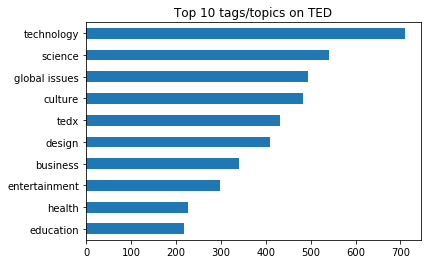

In [15]:
n_topics = 10

tag_counts[:n_topics][::-1].plot(kind='barh',
                                 title=f'Top {n_topics} tags/topics on TED');

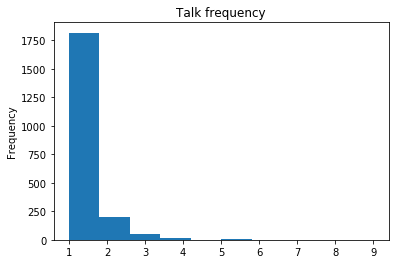

In [16]:
# Most speakers speak just once on ted
ted_talks['speaker'].value_counts().plot(kind='hist', title='Talk frequency');

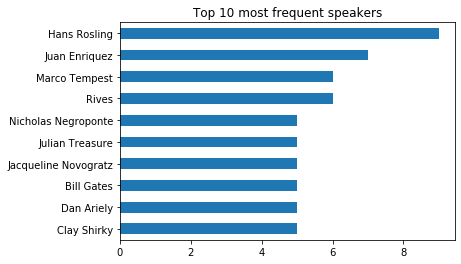

In [17]:
# TODO: convert to interactive w bokeh
n_speakers = 10

ted_talks['speaker']\
    .value_counts()[:n_speakers][::-1]\
    .plot(kind='barh',
          title=f'Top {n_speakers} most frequent speakers');

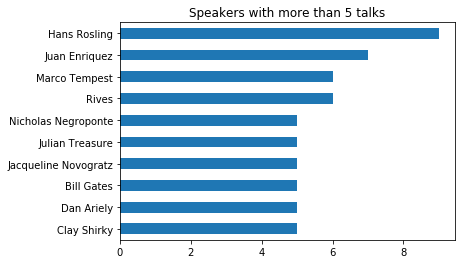

In [18]:
# TODO: convert to interactive w bokeh
n_talks = 5

ted_talks['speaker']\
    .value_counts()[ted_talks['speaker'].value_counts() >= n_talks][::-1]\
    .plot(kind='barh',
          title=f"Speakers with more than {n_talks} talks");

# Start on text processing

In [19]:
nlp_cols = ['speaker', 'headline', 'description', 'duration', 'views_as_of_06162017', 'tags', 'transcript']
analytics_col_start = list(ted_talks.columns).index('wc')

In [20]:
ted_transcripts = ted_talks.loc[:, nlp_cols]
ted_analytics = ted_talks.iloc[:, analytics_col_start:]
display(ted_transcripts.head())
ted_analytics.head()

,speaker,headline,description,duration,views_as_of_06162017,tags,transcript
id,,,,,,,
1,Al Gore,Averting the climate crisis,With the same humor and humanity he exuded in ...,00:16:17,3177001.0,"cars,alternative energy,culture,politics,scien...","0:14\n\n\nThank you so much, Chris.\nAnd it's ..."
2,Amy Smith,Simple designs to save a life,Fumes from indoor cooking fires kill more than...,00:15:06,1379328.0,"MacArthur grant,simplicity,industrial design,a...","0:11\n\n\nIn terms of invention,\nI'd like to ..."
3,Ashraf Ghani,How to rebuild a broken state,Ashraf Ghani's passionate and powerful 10-minu...,00:18:45,790536.0,"corruption,poverty,economics,investment,milita...","0:12\n\n\nA public, Dewey long ago observed,\n..."
4,Burt Rutan,The real future of space exploration,"In this passionate talk, legendary spacecraft ...",00:19:37,1985119.0,"aircraft,flight,industrial design,NASA,rocket ...","0:11\n\n\nI want to start off by saying, Houst..."
5,Chris Bangle,Great cars are great art,American designer Chris Bangle explains his ph...,00:20:04,859487.0,"cars,industrial design,transportation,inventio...","0:12\n\n\nWhat I want to talk about is, as bac..."


,wc,analytic,clout,authentic,tone,wps,sixltr,dic,function,pronoun,...,harm_vice,fairness_virtue,fairness_vice,ingroup_virtue,ingroup_vice,authority_virtue,authority_vice,purity_virtue,purity_vice,morality_general
id,,,,,,,,,,,,,,,,,,,,,
1,2281.0,66.79,75.31,43.31,71.09,15.62,15.65,81.59,51.56,15.61,...,0.04,0.00,0.00,0.48,0.00,0.22,0.0,0.00,0.00,0.22
2,2687.0,45.13,78.94,19.05,54.50,16.79,14.92,84.85,57.39,17.71,...,0.04,0.00,0.00,0.30,0.00,0.11,0.0,0.11,0.04,0.15
3,2506.0,74.47,65.67,27.20,35.53,15.57,21.55,83.60,53.19,12.93,...,0.12,0.16,0.04,0.32,0.12,0.20,0.0,0.04,0.04,0.08
4,3092.0,46.11,71.00,70.27,61.34,16.10,15.27,87.90,56.18,15.94,...,0.19,0.00,0.00,0.19,0.00,0.10,0.0,0.00,0.00,0.16
5,3781.0,38.48,81.00,44.92,66.80,17.67,13.73,89.53,59.75,20.15,...,0.05,0.03,0.00,0.39,0.00,0.05,0.0,0.00,0.03,0.13


### Clean transcript

In [21]:
test_text = ted_transcripts['transcript'][1]

In [22]:
#Run and restart kernel

#!python -m spacy download en_core_web_sm

# or

#!python -m spacy download en_core_web_md

In [23]:
import spacy
# nlp = spacy.load('en_core_web_sm')
nlp = spacy.load('en_core_web_md')

In [24]:
parsed_text = nlp(test_text)

In [25]:
parsed_text.ents

(0:14,
 Chris,
 the other night,
 Air Force Two,
 eight years,
 1:05,
 one,
 1:21,
 Tipper,
 White House,
 1:24,
 Nashville,
 50 miles,
 Nashville,
 1:36,
 Ford,
 Taurus,
 Exit 238,
 Lebanon,
 Tennessee,
 Shoney,
 Tipper,
 2:39,
 Al Gore,
 Tipper,
 next day,
 Africa,
 Nigeria,
 Lagos,
 the day,
 Nashville,
 the Azores Islands,
 Washington,
 Washington,
 the middle of the night,
 Atlantic,
 Washington,
 4:21,
 one,
 Nigeria,
 the United States of America,
 Monterey,
 Al Gore,
 Nigeria,
 yesterday,
 Tipper,
 Shoney,
 5:00,
 U.S.,
 David Letterman,
 Jay Leno,
 One,
 Three days later,
 Bill Clinton,
 Al,
 5:23,
 5:30,
 TED,
 Chris Anderson,
 Al Gore,
 four,
 five,
 the last two days,
 January,
 the United States of America,
 Januarys,
 31 degrees,
 last month,
 39.5 degrees,
 U.S.,
 7:36,
 Vinod,
 John Doerr,
 Sequestration ,
 CCS,
 May,
 2.0,
 11:06,
 annual,
 quarterly,
 two nights ago,
 Nashville,
 every single week,
 Larry Lessig,
 13:26,
 Republican,
 Democrat,
 Republicans,
 the Unit

In [26]:
for ent in parsed_text.ents:
    print(ent.label_)

CARDINAL
PERSON
TIME
PRODUCT
DATE
DATE
CARDINAL
CARDINAL
PERSON
ORG
CARDINAL
GPE
QUANTITY
GPE
TIME
ORG
PRODUCT
FAC
GPE
GPE
ORG
ORG
TIME
PERSON
PERSON
DATE
GPE
GPE
GPE
DATE
GPE
LOC
GPE
GPE
DATE
LOC
GPE
TIME
CARDINAL
GPE
GPE
GPE
PERSON
GPE
DATE
PERSON
PERSON
TIME
GPE
PERSON
PERSON
CARDINAL
DATE
PERSON
PERSON
TIME
TIME
PERSON
PERSON
PERSON
CARDINAL
CARDINAL
DATE
DATE
GPE
ORG
QUANTITY
DATE
QUANTITY
GPE
CARDINAL
PERSON
PERSON
ORG
ORG
DATE
CARDINAL
CARDINAL
DATE
DATE
DATE
GPE
DATE
PERSON
CARDINAL
NORP
NORP
NORP
GPE
GPE
DATE
NORP
CARDINAL
TIME
NORP
NORP
CARDINAL
CARDINAL
